<a href="https://colab.research.google.com/github/shinjangwoon/TIL/blob/master/Data%20Analysis/EDA/Exploratory%20Data%20Analysis(EDA)/EDA_titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 타이타닉 데이터 EDA

## EDA란?
Exploratory data analysis(탐색적 데이터 분석)으로 주어진 데이터를 다양한 방법으로 정보를 찾아내는 데이터 분석 방법  
모델링 이전 데이터를 확인하고 흟어보면서 데이터에 대한 이해를 목적으로 시행되며 이를 바탕으로 정교한 모델링을 수행 할 수 있다.

## titanic 데이터 설명
타이타닉호에 승선했던 탑승자 정보를 담고 있는 데이터이다. 데이터분석 필드에서는 교육용 및 입문용 데이터로 오랫동안 사랑받아 온 데이터이며  
탑승자 정보를 바탕으로 이 탑승자가 생존했는지 혹은 사망했는지 분류하는 모델링을 목적으로 제작 된 데이터입니다.  

**columns 정보**
- pclass : 객실 등급
- survived : 생존 유무
- name : 칭호를 포함한 이름
- sex : 성별
- age : 나이
- sibsp : 형제 혹은 부부의 수
- parch : 부모, 혹은 자녀의 수
- ticket : 탑승권 종류 (각 숫자가 의미하는 바는 데이터를 통해 알 수 있는 것이 없을 수 있습니다.)
- fare : 지불한 운임
- cabin : 객실정보
- embarked : 선착장정보
- boat : 탈출한 보트가 있다면 boat 번호
- body : 사망자의 시신 수습 후 부여한 일련번호
- home : 출신

## EDA 진행 예시

### 타이타닉 탑승자 데이터 불러오기

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# 필요모듈 import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# 데이터 로딩 및 확인
df = pd.read_csv('titanic.csv')
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [ ]:
# 데이터 종류 확인하기
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


각 작업을 거친 후 데이터에 대한 리포트 혹은 시각화를 통해 얻을 수 있는 정보를 기술 해봅니다.  
위의 정보를 바탕으로 1309개의 샘플이 존재하지만 몇몇 개의 컬럼에는 결측치(비어있는 값)이 있음을 확인 할 수 있습니다

In [ ]:
# 기초통계량 확인
df.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881138,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413493,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


전체 탑승객의 생존률, 평균 연령 정도가 우리가 확인하고 추후 생각해보아야 할 데이터 같습니다.

## 샘플링으로 데이터 살펴보기
판다스 수업시간에 진행했던 팬시 인덱싱을 사용하여 다양한 가정을 통한 데이터를 살펴보겠습니다.  
전체 탑승객의 생존률은 38% 정도였지만 1등급 객실에 승선한 여성의 경우의 생존률을 알아보겠습니다.

In [ ]:
df['sex'].value_counts()

male      843
female    466
Name: sex, dtype: int64

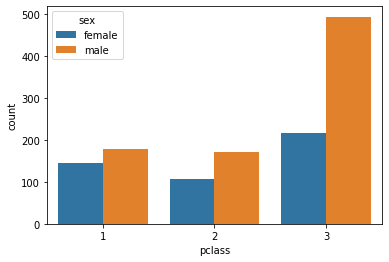

In [ ]:
sns.countplot(data=df, x='pclass', hue='sex')

In [ ]:
df[(df['pclass']==1) & (df['sex']=='female') & (df['survived']==1)]['survived'].value_counts()

1    139
Name: survived, dtype: int64

In [ ]:
df[(df['pclass'] == 1) & (df['sex'] =='female')]['survived'].sum()

139

In [ ]:
df[(df['pclass'] == 2) & (df['sex'] =='female')]['survived'].sum()

94

In [ ]:
df[(df['pclass'] == 3) & (df['sex'] =='female')]['survived'].sum()

106

In [ ]:
df[(df['pclass'] == 1) & (df['sex'] =='male')]['survived'].sum()

61

In [ ]:
df[(df['pclass'] == 2) & (df['sex'] =='male')]['survived'].sum()

25

In [ ]:
df[(df['pclass'] == 3) & (df['sex'] =='male')]['survived'].sum()

75

- 3등실에 가장 많이 탑승하였지만 살아남은 비율은 1등실이 가장 높은 것을 확인할 수 있습니다.


### class에 따른 생존율을 보다보니 여성이 남성보다 인원이 적음에도 불구하고 더 많은 인원이 살아남은 것을 확인할 수 있는데 나이보다 성별이 더 많은 영향을 미치는지 확인


- 먼저 나이가 어릴수록 생존율이 높은지 확인


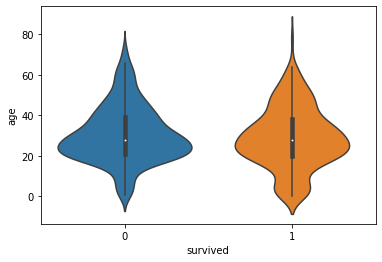

In [ ]:
sns.violinplot(data=df, x='survived', y='age')

- 생존한 사람들의 나이 분포와 사망한 사람들의 나이 분포 사이에는 큰 차이가 없는 것 같음
- 나이가 어릴수록 생존율이 높다고 하긴 어려울 것 같음

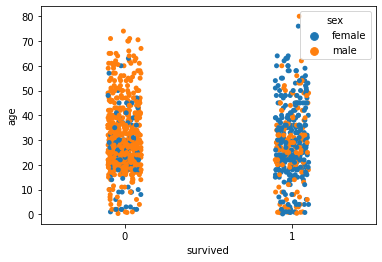

In [ ]:
sns.stripplot(data=df, x='survived', y='age', hue='sex')

- age보다 확연히 차이가 보이는 것으로 보아 나이보다 성별이 더 생존율에 더 많은 영향을 미치는것 같다.


### 시각화로 데이터 살펴보기

#### 전체 탑승자 연령대 시각화

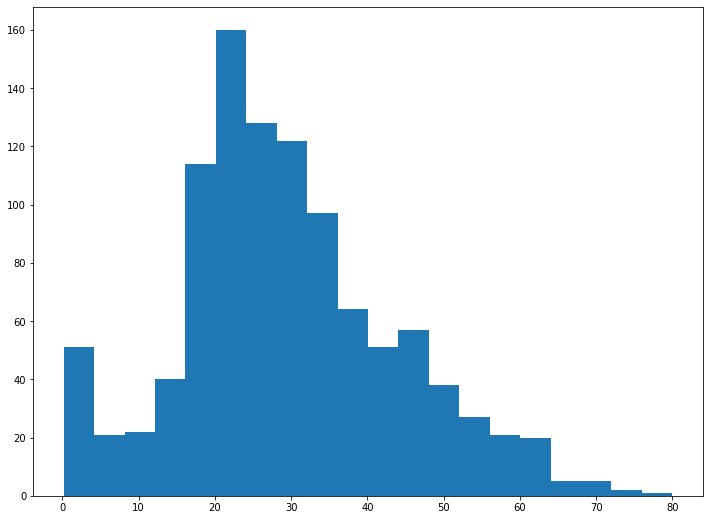

In [ ]:
# 판다스 내장 함수로 시각화 가능
df['age'].hist(bins=20,figsize=(12,9),grid=False);


### 객실 등급별 생존률
판다스 수업시간에 진행하지는 않았지만 각 데이터의 범주에 따라 데이터를 분류하는 groupby 함수의 예시를 사용해보겠습니다.

In [ ]:
df.groupby('pclass').mean()

,survived,age,sibsp,parch,fare,body
pclass,,,,,,
1,0.619195,39.159930,0.436533,0.365325,87.508992,162.828571
2,0.429603,29.506705,0.393502,0.368231,21.179196,167.387097
3,0.255289,24.816367,0.568406,0.400564,13.302889,155.818182


## 전체 생존률

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


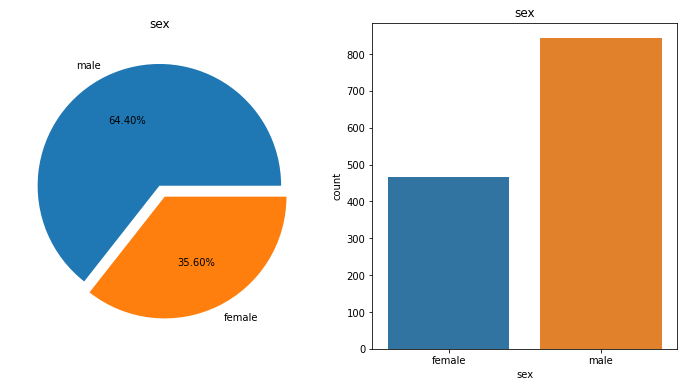

In [ ]:
fig = plt.figure(figsize=(12,6))
graph1 = fig.add_subplot(1,2,1)
df['sex'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.2f%%',ax=graph1)
graph1.set_title('sex')
graph1.set_ylabel('')
graph2 = fig.add_subplot(1,2,2)
sns.countplot('sex',data=df,ax=graph2)
graph2.set_title('sex')
plt.show(fig)

## 성별에 따른 생존자 분류

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


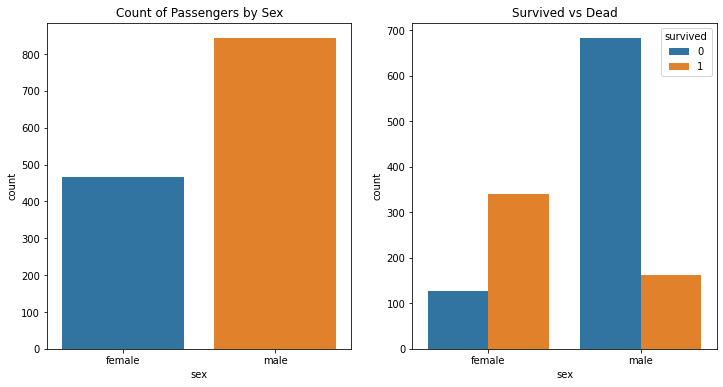

In [ ]:
fig = plt.figure(figsize=(12,6))
graph1 = fig.add_subplot(1,2,1)
graph2 = fig.add_subplot(1,2,2)

sns.countplot('sex',data=df, ax=graph1)
graph1.set_title('Count of Passengers by Sex')

sns.countplot('sex',hue='survived',data=df, ax=graph2)
graph2.set_title('Survived vs Dead')
plt.show()

## 연령, 성별, 객실등급 한꺼번에

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


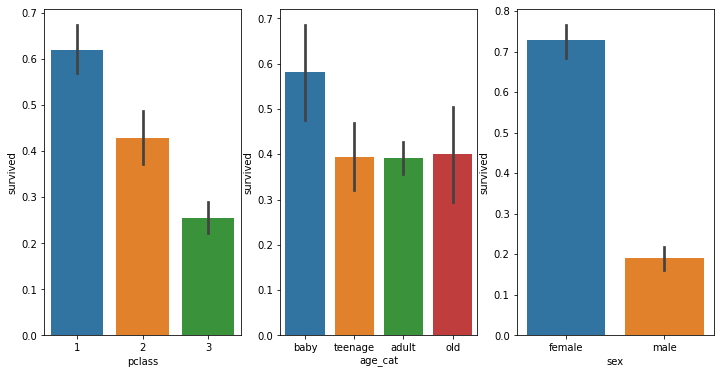

In [ ]:
df['age_cat'] = pd.cut(df['age'], bins=[0, 10, 20, 50, 100], 
                             include_lowest=True, labels=['baby', 'teenage', 'adult', 'old'])
fig = plt.figure(figsize=(12,6))
graph1 = fig.add_subplot(1,3,1)
graph2 = fig.add_subplot(1,3,2)
graph3 = fig.add_subplot(1,3,3)

sns.barplot('pclass', 'survived', data=df, ax=graph1)
sns.barplot('age_cat', 'survived', data=df, ax=graph2)
sns.barplot('sex', 'survived', data=df, ax=graph3)

## 연령대별 분포 생존자, 사망자 비교

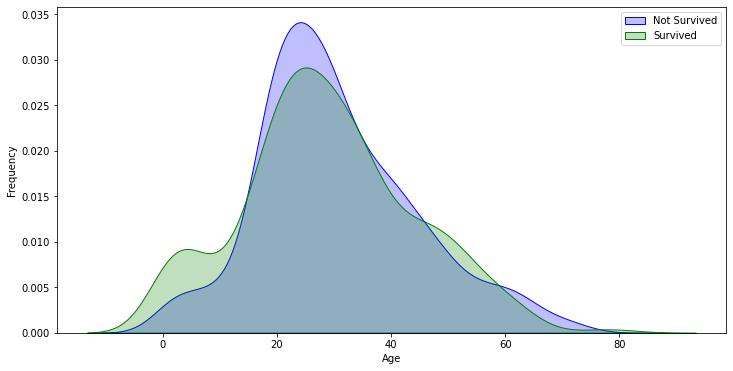

In [ ]:
fig = plt.figure(figsize=(12,6))
graph1 = fig.add_subplot(1,1,1)
sns.kdeplot(df["age"][(df["survived"] == 0) & (df["age"].notnull())], 
                ax = graph1, color="Blue", shade = True)
sns.kdeplot(df["age"][(df["survived"] == 1) & (df["age"].notnull())], 
                ax =graph1, color="Green", shade= True)
graph1.set_xlabel("Age")
graph1.set_ylabel("Frequency")
graph1.legend(["Not Survived","Survived"])

### 요금은?

In [ ]:
# 요금 정보
df['fare'].describe()

count    1308.000000
mean       33.295479
std        51.758668
min         0.000000
25%         7.895800
50%        14.454200
75%        31.275000
max       512.329200
Name: fare, dtype: float64

In [ ]:
# 요금이 너무 광범위하므로 나누기
def fare(x):
    if(x < 33):
        return 'low'
    elif (x < 51):
        return 'middle'
    else:
        return 'high'
df['fare_x'] = df['fare'].map(fare)


In [ ]:
df['fare_x'].value_counts()

low       936
high      235
middle     56
Name: fare_x, dtype: int64

In [ ]:
df['age'].value_counts()

24.00    47
22.00    43
21.00    41
30.00    40
18.00    39
         ..
0.33      1
22.50     1
70.50     1
0.67      1
26.50     1
Name: age, Length: 98, dtype: int64

- 나이가 0.33살등 너무 낮은 나이는 제거하는게 좋을듯합니다
- 보통 요금을 내지않는 10살 미만까지는 제거하겠습니다

In [ ]:
idx = df[df['age'] < 10].index
idx

Int64Index([   1,    2,   94,  273,  339,  340,  359,  377,  385,  398,  427,
             430,  434,  478,  479,  492,  514,  515,  540,  541,  548,  549,
             587,  588,  590,  591,  611,  622,  623,  624,  627,  639,  640,
             641,  643,  657,  658,  659,  678,  679,  733,  734,  747,  762,
             763,  794,  807,  820,  825,  826,  866,  894,  895,  916,  934,
             937, 1025, 1048, 1082, 1096, 1097, 1098, 1099, 1101, 1102, 1103,
            1111, 1112, 1142, 1143, 1144, 1145, 1156, 1187, 1189, 1206, 1208,
            1209, 1230, 1240, 1256, 1257],
           dtype='int64')

In [ ]:
# 우선 10살 미만은 제거
df.drop(idx, inplace=True)

In [ ]:
df['age'].describe()

count    964.000000
mean      32.080394
std       12.765641
min       10.000000
25%       22.000000
50%       29.000000
75%       40.000000
max       80.000000
Name: age, dtype: float64

In [ ]:
# 나이대 설정
def age_categorize(age):
    age = (age // 10) * 10
    return age

In [ ]:
df['age_nm'] = df['age'].apply(age_categorize)
df['age_nm']

0       20.0
3       30.0
4       20.0
5       40.0
6       60.0
        ... 
1304    10.0
1305     NaN
1306    20.0
1307    20.0
1308    20.0
Name: age_nm, Length: 1227, dtype: float64

In [ ]:
# 혹시 모를 copy
df_copy = df.copy()

In [ ]:
df_copy['age_nm']

0       20.0
3       30.0
4       20.0
5       40.0
6       60.0
        ... 
1304    10.0
1305     NaN
1306    20.0
1307    20.0
1308    20.0
Name: age_nm, Length: 1227, dtype: float64

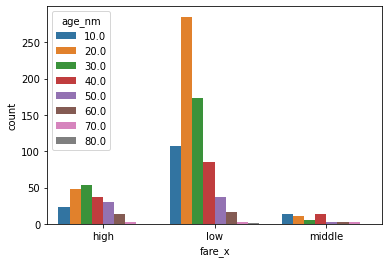

In [ ]:
sns.countplot(data = df_copy, x=df_copy['fare_x'], hue=df_copy['age_nm'])

- 평균인 33보다 적게 낸 연령대 중 가장 많은 비율은 20대이다.  표준 편차보다 요금을 높게 낸 연령대는 30대가 가장 많다.
